In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [20]:
taxi_df = pd.read_csv('Data/Cab_Data.csv')
taxi_df['Date of Travel']= pd.to_datetime(taxi_df['Date of Travel'],unit = 'D',origin = '1899-12-30') 
taxi_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
taxi_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [8]:
taxi_df['City'].value_counts()


NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [10]:
city_df = pd.read_csv('Data/City.csv')
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
# Now we are checking the customer data
customer_id = pd.read_csv('Data/Customer_ID.csv')
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
customer_id["Gender"].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [14]:
transaction_id = pd.read_csv('Data/Transaction_ID.csv')
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
transaction_id["Payment_Mode"].value_counts()
transaction_id["Customer ID"].value_counts()

494      54
2939     53
1070     51
2766     51
1628     50
         ..
34279     1
26182     1
33753     1
34525     1
39761     1
Name: Customer ID, Length: 49171, dtype: int64

In [16]:
transaction_id["Payment_Mode"].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [17]:
transaction_id["Transaction ID"].value_counts()

10000011    1
10293418    1
10293416    1
10293415    1
10293414    1
           ..
10146707    1
10146706    1
10146705    1
10146704    1
10440108    1
Name: Transaction ID, Length: 440098, dtype: int64

In [23]:
#We are now merging the whole dataset
merged= taxi_df.merge(transaction_id, on= 'Transaction ID').merge(customer_id, on ='Customer ID').merge(city_df, on = 'City')
merged.head(15)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [24]:
merged.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


<AxesSubplot:xlabel='Market Share', ylabel='Users'>

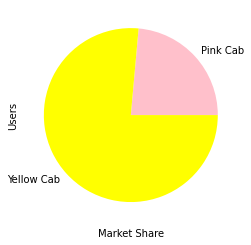

In [37]:
# We want to see the market share for both companies
piesum=merged.groupby(('Company'))
piesum=piesum.count()['Users']
plt.xlabel('Market Share')
piesum.plot(kind="pie",colors=["pink","yellow"])

In [40]:
#Finding gender distribution

gender_cab=merged.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()

print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


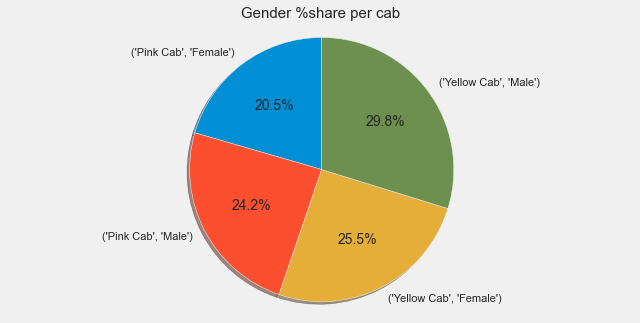

In [59]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,5))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Gender %share per cab', fontsize = 15)
plt.show()

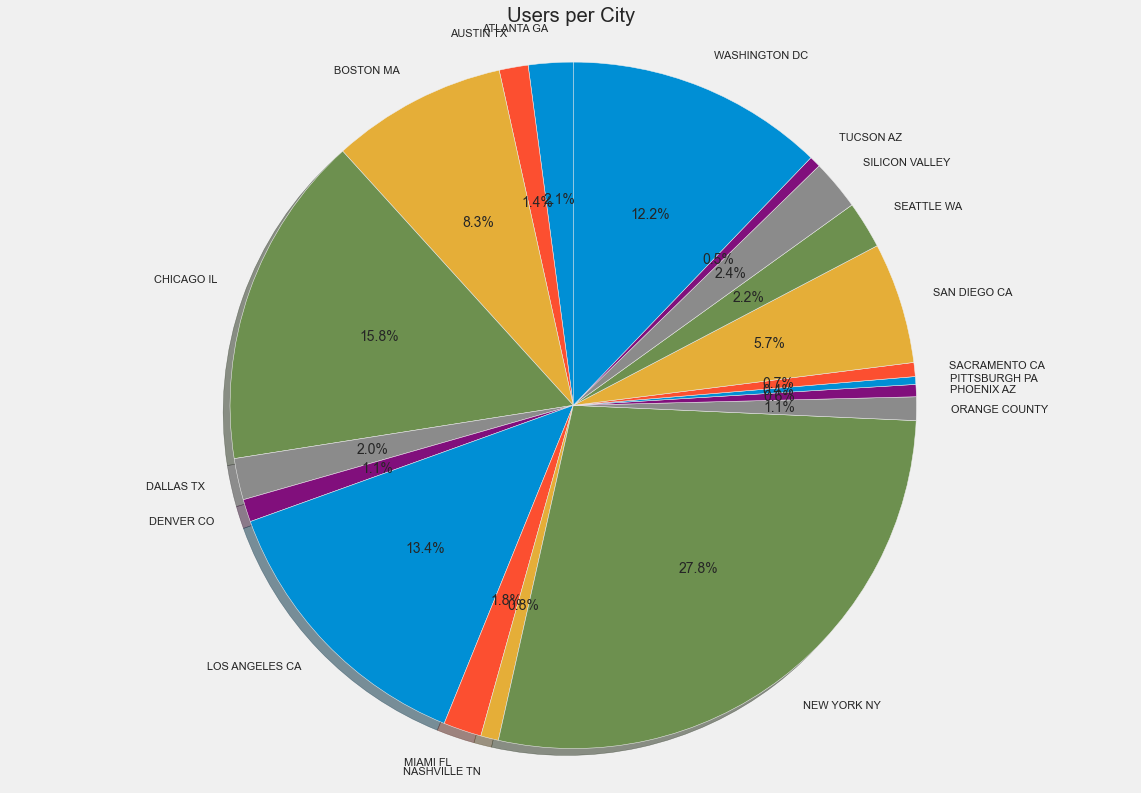

In [56]:
#Users per City(We can see that New york has the highest cab user rate)

city_users = merged.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

In [57]:
#Calculating profit margins
profit = merged.groupby('Company')
price_charged = profit['Price Charged'].mean()
cost_trip = profit['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

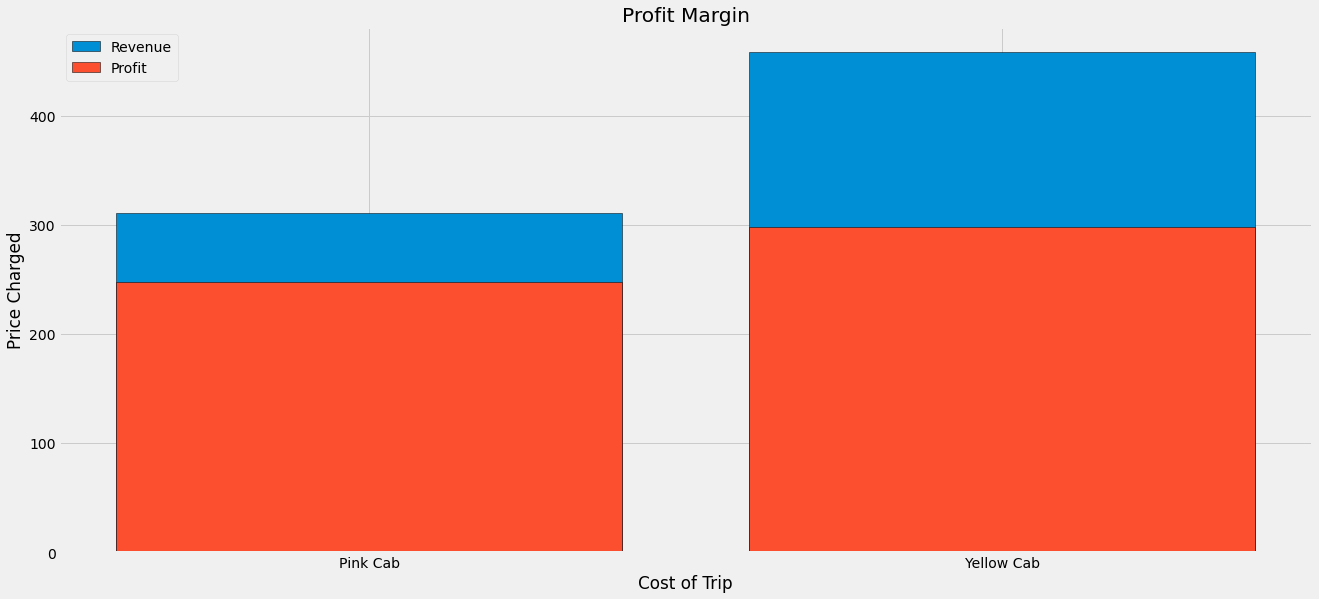

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

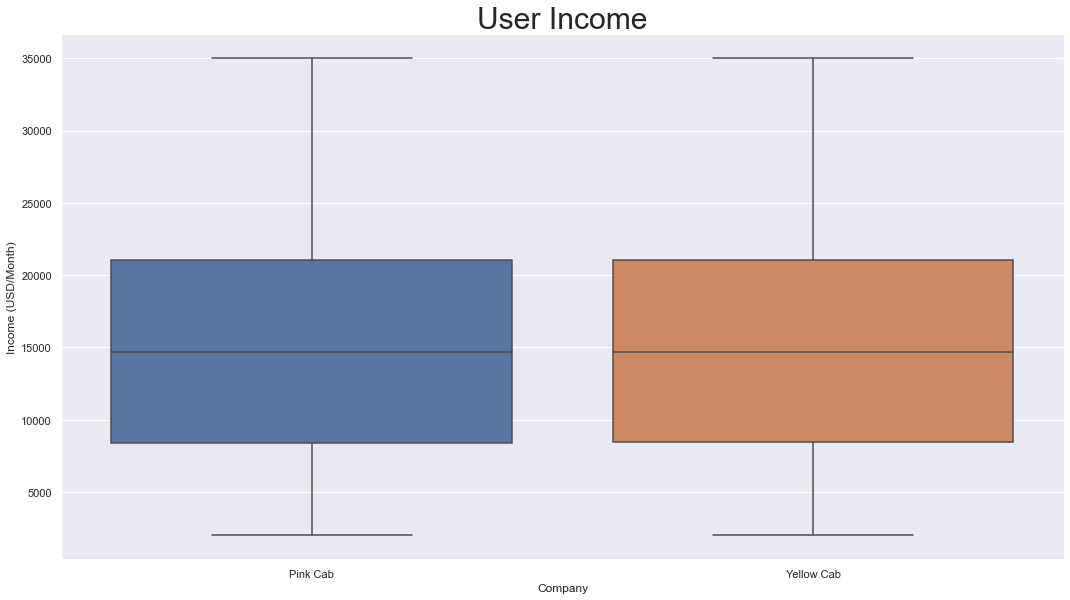

In [50]:
#Average income of cab users

sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(merged['Company'], merged['Income (USD/Month)'])
plt.title('User Income', fontsize=30)
plt.show()

<AxesSubplot:xlabel='year'>

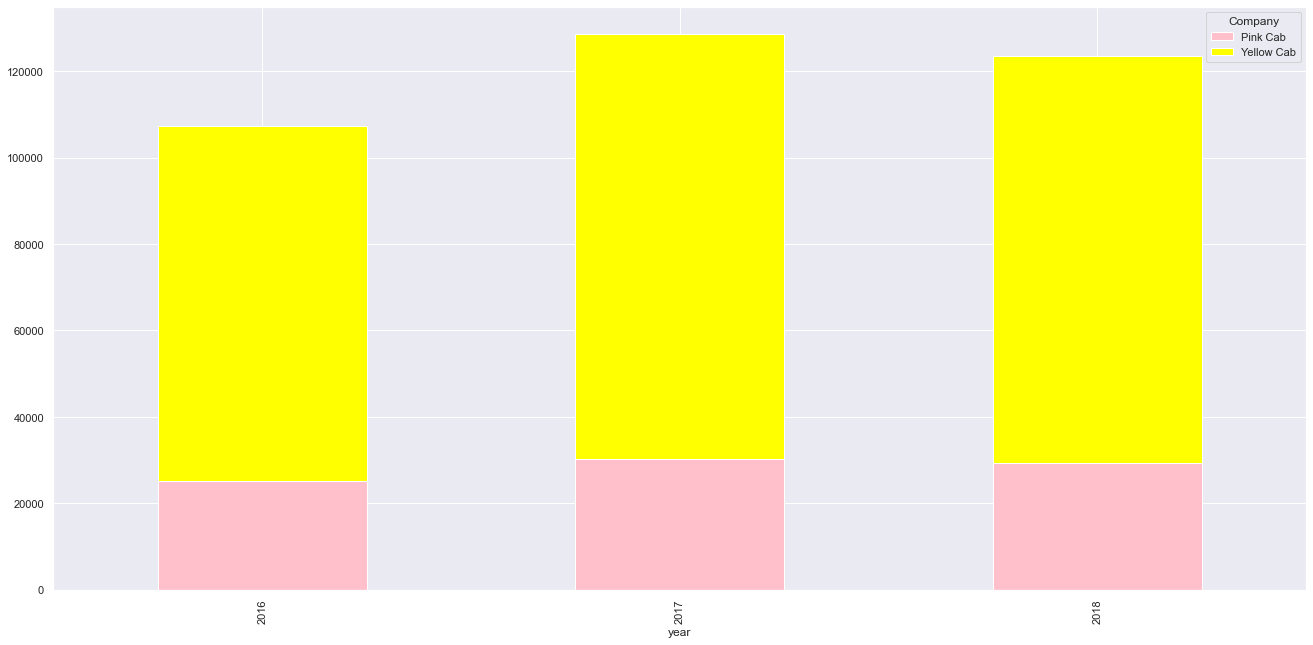

In [52]:
#total cab users per year
merged['year'] = merged['Date of Travel'].dt.year
merged['year']
year_users=merged.groupby(by=['year','Company']).count()['Users'].unstack("Company")
year_users.plot(kind="bar", figsize=(20,10), color=["pink","yellow"], stacked=True)